## QB Data Analysis

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
qb_file = "qb_games_more_10.csv"

In [2]:
qb_data = pd.read_csv(qb_file)
qb_data.head()

,Unnamed: 0,name,id,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3
0,31,A.J. Feeley,FeelA.00,2001,2002-01-06,16,24.235,PHI,@,TAM,W 17-13,NaN,10.0,14.0,71.43,143.0,2.0,1.0,114.0,0.0,0.0,10.21,9.86,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,A.J. Feeley,FeelA.00,2002,2002-12-01,12,25.199,PHI,NaN,STL,W 10-3,*,14.0,30.0,46.67,181.0,0.0,0.0,66.1,3.0,24.0,6.03,6.03,2.0,3.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,A.J. Feeley,FeelA.00,2002,2002-12-08,13,25.206,PHI,@,SEA,W 27-20,*,21.0,35.0,60.00,190.0,2.0,1.0,81.8,0.0,0.0,5.43,5.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,A.J. Feeley,FeelA.00,2002,2002-12-15,14,25.213,PHI,NaN,WAS,W 34-21,*,16.0,28.0,57.14,220.0,2.0,1.0,91.4,2.0,10.0,7.86,7.68,2.0,5.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,A.J. Feeley,FeelA.00,2002,2002-12-21,15,25.219,PHI,@,DAL,W 27-3,*,19.0,33.0,57.58,253.0,1.0,2.0,66.9,1.0,8.0,7.67,5.55,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning

In [3]:
# 26951 games included, with 34 columns
qb_data.shape

(26951, 34)

In [4]:
# see which columns have na values
qb_data.isna().any()

Unnamed: 0    False
name          False
id            False
Year          False
Date          False
G.            False
Age           False
Tm            False
X              True
Opp           False
Result        False
GS             True
Cmp            True
Att           False
Cmp.           True
Yds            True
TD             True
Int            True
Rate           True
Sk             True
Yds.1          True
Y.A            True
AY.A           True
Att.1          True
Yds.2          True
Y.A.1          True
TD.1           True
TD.2           True
Pts            True
Fmb            True
FF             True
FR             True
Yds.3          True
TD.3           True
dtype: bool

In [5]:
# replace most NA values with 0
columns_to_set_na_to_0 = ['Cmp','Cmp.','Yds','TD','Int','Rate','Sk','Yds.1','Y.A','AY.A','Att.1','Yds.2','Y.A.1','TD.1','TD.2','Pts','Fmb','FF','FR','Yds.3','TD.3']
qb_data[columns_to_set_na_to_0] = qb_data[columns_to_set_na_to_0].fillna(0)
# make game started a boolean
qb_data['GS'] = qb_data['GS'] == "*"
# get rid of this random column
qb_data = qb_data.drop('Unnamed: 0', axis=1)

In [6]:
# extract a win from the result column with a 1, or a 0 for a loss
qb_data['team_win'] = [1 if "W" in x else 0 for x in qb_data['Result']]
# get a list of games the team won that that QB started
qb_data['start_win'] = [1 if ("W" in qb_data.loc[i,'Result'] and qb_data.loc[i,'GS'] == True) else 0 for i in range(qb_data.shape[0])]

In [7]:
# iterating through the list of QBs to figure out which "game number" of their career each game represents
games_list = []
games_started = []
last_qb = None
for index, row in qb_data.iterrows():
    current_qb = row.id
    if current_qb != last_qb:
        count = 1
        if row['GS'] == True:
            gs_count = 1
        else:
            gs_count = 0
    else:
        count += 1
        if row['GS'] == True:
            gs_count +=1
    games_list.append(count)
    games_started.append(gs_count)
    last_qb = current_qb
qb_data['game_count'] = games_list
qb_data['start_count'] = games_started

In [8]:
qb_data.loc[0:50,['name','GS','game_count','start_count']]

,name,GS,game_count,start_count
0,A.J. Feeley,False,1,0
1,A.J. Feeley,True,2,1
2,A.J. Feeley,True,3,2
3,A.J. Feeley,True,4,3
4,A.J. Feeley,True,5,4
5,A.J. Feeley,True,6,5
6,A.J. Feeley,False,7,5
7,A.J. Feeley,True,8,6
8,A.J. Feeley,True,9,7
9,A.J. Feeley,False,10,7


In [221]:
set(qb_data.name)

{'A.J. Feeley',
 'A.J. McCarron',
 'Aaron Brooks',
 'Aaron Rodgers',
 'Adrian Burk',
 'Akili Smith',
 'Al Dorow',
 'Alex Smith',
 'Alex Tanney',
 'Andre Ware',
 'Andrew Luck',
 'Andrew Walter',
 'Andy Dalton',
 'Anthony Dilweg',
 'Archie Manning',
 'Art Schlichter',
 'Austin Davis',
 'Babe Laufenberg',
 'Babe Parilli',
 'Baker Mayfield',
 'Bart Starr+',
 'Ben Roethlisberger',
 'Bernie Kosar',
 'Bert Jones',
 'Bill Demory',
 'Bill Kenney',
 'Bill Munson',
 'Bill Musgrave',
 'Bill Nelsen',
 'Bill Troup',
 'Billy Kilmer',
 'Billy Volek',
 'Billy Wade',
 'Blaine Gabbert',
 'Blair Kiel',
 'Blake Bortles',
 'Bob Avellini',
 'Bob Berry',
 'Bob Brodhead',
 'Bob Celeri',
 'Bob Clatterbuck',
 'Bob Davis',
 'Bob Gagliano',
 'Bob Griese+',
 'Bob Holly',
 'Bob Leahy',
 'Bob Naponic',
 'Bob Waterfield+',
 'Bob Waters',
 'Bobby Douglass',
 'Bobby Hebert',
 'Bobby Hoying',
 'Bobby Layne+',
 'Bobby Scott',
 'Bobby Thomason',
 'Boomer Esiason',
 'Brad Goebel',
 'Brad Johnson',
 'Brady Quinn',
 'Brandon 

In [9]:
# get the total number of games a player played and started in their career
qb_total_games = qb_data.groupby(['id', 'name'])['game_count', 'start_count', 'Year'].max().reset_index('name')
#qb_games_started = qb_data.groupby(['name','id'])['start_count'].max()
qb_total_games.head()

,name,game_count,start_count,Year
id,,,,
AdamTo00,Tony Adams,14,9,1987
AikmTr00,Troy Aikman+,172,171,2000
AlbeFr00,Frankie Albert,30,28,1952
AlleJo02,Josh Allen,6,5,2018
AndeDe00,Derek Anderson,55,48,2018


In [10]:
# get sum totals for each QB on the following columns
sum_columns =['Cmp', 'Att','Yds','TD','Int','Sk','Fmb','team_win','start_win']
qb_totals = qb_data.groupby(['name', 'id'])[sum_columns].sum()#.reset_index('name')

# join that table with the games started and total games tables
qb_totals = qb_totals.join(qb_total_games, on='id').drop('name', axis=1).reset_index('name')
#qb_totals.join(qb_totals.groupby('id')['Year'].max())

In [11]:
# add some more columns based on career totals
qb_totals['Cmp.'] = qb_totals['Cmp'] / qb_totals['Att']
qb_totals['Y.A'] = qb_totals['Yds'] / qb_totals['Att']
qb_totals['TD_pct'] = qb_totals['TD'] / qb_totals['Att']
qb_totals['Int_pct'] = qb_totals['Int'] / qb_totals['Att']
# below is the winning percentage for the team in the games that they started
qb_totals['gs_wp'] = (qb_totals['start_win'] / qb_totals['start_count']).fillna(0)
qb_totals['sack_pg'] = (qb_totals['Sk'] / qb_totals['start_count']).fillna(0)

In [66]:
# just looking at qbs with at least 10 starts
qb_10_starts = qb_totals[qb_totals.start_count >= 30]
qb_10_starts.shape
# 346 QBs in our dataset with at least 10 starts

(212, 19)

In [67]:
# Lets sort among the QBs with at least 10 starts in terms of team winning percentage in games they started
qb_10_starts.sort_values('gs_wp', ascending=False)
# Look who's #1!

,name,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Year,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
GrahOt00,Otto Graham+,995.0,1796.00,14940.0,97.0,106.0,0.0,0.0,59,59,74,74,1955,0.554009,8.318486,0.054009,0.059020,0.797297,0.000000
BradTo00,Tom Brady,6761.0,10578.00,78790.0,575.0,197.0,530.0,100.0,230,230,296,296,2018,0.639157,7.448478,0.054358,0.018624,0.777027,1.790541
StauRo00,Roger Staubach+,1860.0,3271.00,24820.0,174.0,119.0,0.0,0.0,96,95,133,129,1979,0.568633,7.587894,0.053195,0.036380,0.736434,0.000000
LamoDa00,Daryle Lamonica,1321.0,2695.00,19769.0,171.0,135.0,57.0,0.0,72,66,107,91,1973,0.490167,7.335436,0.063451,0.050093,0.725275,0.626374
BradTe00,Terry Bradshaw+,2234.0,4260.00,30880.0,233.0,230.0,34.0,0.0,118,116,173,167,1982,0.524413,7.248826,0.054695,0.053991,0.694611,0.203593
McMaJi00,Jim McMahon,1536.0,2665.00,18846.0,103.0,91.0,230.0,0.0,71,68,105,98,1994,0.576360,7.071670,0.038649,0.034146,0.693878,2.346939
MannPe00,Peyton Manning,6760.0,10387.00,79104.0,578.0,276.0,340.0,24.0,198,198,289,289,2015,0.650814,7.615673,0.055646,0.026572,0.685121,1.176471
RoetBe00,Ben Roethlisberger,4808.0,7513.00,58881.0,375.0,205.0,539.0,102.0,154,153,229,227,2018,0.639957,7.837215,0.049913,0.027286,0.674009,2.374449
dw1,Danny White,1918.0,3217.00,23578.0,167.0,143.0,217.0,0.0,68,66,106,99,1988,0.596208,7.329189,0.051912,0.044451,0.666667,2.191919
StabKe00,Ken Stabler+,2435.0,4049.00,30153.0,212.0,224.0,245.0,0.0,102,100,159,151,1984,0.601383,7.447024,0.052359,0.055322,0.662252,1.622517


### Exploratory Data Analysis

In [68]:
qb_10_starts.describe()

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Year,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1811.778302,3136.903868,22093.735849,138.905660,115.287736,154.617925,10.570755,54.377358,52.688679,106.948113,100.839623,1995.382075,0.567454,6.917109,0.042502,0.039248,0.496674,1.535061
std,1226.100443,1960.627151,14571.949816,101.027473,66.122156,141.122616,20.594935,37.343532,37.288897,57.803574,58.082249,17.761993,0.072735,0.498114,0.008271,0.013522,0.103708,1.076513
min,298.000000,649.000000,4318.000000,21.000000,20.000000,0.000000,0.000000,7.000000,7.000000,32.000000,30.000000,1955.000000,0.429245,5.252140,0.024925,0.014472,0.181818,0.000000
25%,877.750000,1603.750000,10727.750000,60.000000,66.000000,8.250000,0.000000,24.750000,23.750000,58.750000,52.000000,1981.000000,0.533806,6.654679,0.036591,0.029601,0.427864,0.134423
50%,1544.000000,2690.500000,19047.500000,116.000000,101.000000,125.500000,0.000000,46.000000,45.000000,95.000000,86.000000,1998.000000,0.567208,6.929445,0.041268,0.036217,0.498466,1.852151
75%,2321.750000,4052.000000,28943.500000,185.250000,159.000000,242.250000,12.000000,75.000000,72.500000,143.750000,136.250000,2011.000000,0.597055,7.234619,0.047567,0.048537,0.572967,2.350566
max,6781.000000,10938.000000,79104.000000,578.000000,361.000000,556.000000,102.000000,230.000000,230.000000,321.000000,319.000000,2018.000000,1.353786,8.318486,0.072365,0.082677,0.797297,3.549020


In [69]:
# comparing this to his football reference page i see this data includes playoff games, might be unfair to include that
#qb_10_starts

In [70]:
# poor bobby hoying
qb_10_starts.sort_values('sack_pg', ascending=False)

,name,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Year,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
LomaNe00,Neil Lomax,1843.0,3187.00,23093.0,138.0,91.0,362.0,0.0,47,47,103,102,1988,0.578287,7.245999,0.043301,0.028553,0.460784,3.549020
CunnRa00,Randall Cunningham,2582.0,4556.00,31913.0,217.0,135.0,484.0,0.0,82,82,146,139,2001,0.566725,7.004609,0.047629,0.029631,0.589928,3.482014
EasoTo00,Tony Eason,925.0,1576.00,11380.0,67.0,50.0,180.0,0.0,29,28,55,52,1989,0.586929,7.220812,0.042513,0.031726,0.538462,3.461538
CarrDa00,David Carr,1314.0,2203.00,14057.0,61.0,69.0,252.0,1.0,22,21,79,75,2010,0.596459,6.380844,0.027690,0.031321,0.280000,3.360000
BeueSt00,Steve Beuerlein,1882.0,3313.00,23967.0,144.0,111.0,326.0,0.0,53,48,116,103,2003,0.568065,7.234229,0.043465,0.033504,0.466019,3.165049
LosmJ.00,J.P. Losman,551.0,930.00,6062.0,32.0,33.0,101.0,8.0,11,10,35,32,2008,0.592473,6.518280,0.034409,0.035484,0.312500,3.156250
HogeGa00,Gary Hogeboom,732.0,1311.00,9189.0,48.0,58.0,113.0,0.0,20,18,46,36,1989,0.558352,7.009153,0.036613,0.044241,0.500000,3.138889
MajkDo00,Don Majkowski,1042.0,1870.00,12543.0,66.0,66.0,172.0,0.0,26,25,64,55,1996,0.557219,6.707487,0.035294,0.035294,0.454545,3.127273
rg3,Robert Griffin,771.0,1222.00,8996.0,44.0,27.0,123.0,29.0,14,14,41,40,2016,0.630933,7.361702,0.036007,0.022095,0.350000,3.075000
TaylTy00,Tyrod Taylor,847.0,1382.00,9602.0,53.0,20.0,142.0,20.0,24,24,49,47,2018,0.612880,6.947902,0.038350,0.014472,0.510638,3.021277


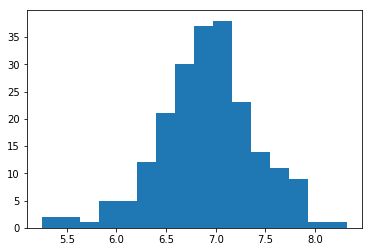

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(qb_10_starts['Y.A'], bins="auto")
plt.show()

In [72]:
qb_10_starts['Y.A'].describe()

count    212.000000
mean       6.917109
std        0.498114
min        5.252140
25%        6.654679
50%        6.929445
75%        7.234619
max        8.318486
Name: Y.A, dtype: float64

In [73]:
qb_10_starts

,name,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Year,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
BrooAa00,Aaron Brooks,1719.0,3040.00,20822.0,129.0,95.0,239.0,0.0,39,39,92,91,2006,0.565461,6.849342,0.042434,0.031250,0.428571,2.626374
RodgAa00,Aaron Rodgers,3756.0,5805.00,45426.0,364.0,89.0,424.0,70.0,106,106,167,164,2018,0.647028,7.825323,0.062705,0.015332,0.646341,2.585366
BurkAd00,Adrian Burk,473.0,1008.00,6647.0,59.0,79.0,0.0,0.0,18,14,51,39,1956,0.469246,6.594246,0.058532,0.078373,0.358974,0.000000
DoroAl00,Al Dorow,522.0,1098.00,7032.0,57.0,79.0,0.0,0.0,19,17,43,37,1962,0.475410,6.404372,0.051913,0.071949,0.459459,0.000000
SmitAl03,Alex Smith,3193.0,5119.00,35388.0,205.0,101.0,417.0,47.0,95,95,166,164,2018,0.623755,6.913069,0.040047,0.019730,0.579268,2.542683
LuckAn00,Andrew Luck,1942.0,3253.00,23094.0,164.0,88.0,174.0,42.0,49,49,84,84,2018,0.596987,7.099293,0.050415,0.027052,0.583333,2.071429
DaltAn00,Andy Dalton,2487.0,4001.00,28450.0,185.0,106.0,248.0,34.0,68,68,120,120,2018,0.621595,7.110722,0.046238,0.026493,0.566667,2.066667
MannAr00,Archie Manning,1962.0,3528.00,23276.0,121.0,162.0,72.0,0.0,32,31,131,125,1984,0.556122,6.597506,0.034297,0.045918,0.248000,0.576000
PariBa00,Babe Parilli,1507.0,3210.00,22095.0,173.0,200.0,0.0,0.0,60,47,133,99,1969,0.469470,6.883178,0.053894,0.062305,0.474747,0.000000
StarBa00,Bart Starr+,1842.0,3193.00,25057.0,156.0,131.0,0.0,0.0,95,94,149,145,1971,0.576887,7.847479,0.048857,0.041027,0.648276,0.000000


In [74]:
retired_qbs = qb_10_starts[qb_10_starts.Year < 2018]

In [75]:
current_qbs = qb_10_starts[qb_10_starts.Year == 2018]

In [76]:
retired_qbs.shape

(183, 19)

In [77]:
current_qbs.shape

(29, 19)

In [78]:
qb_10_starts.shape

(212, 19)

In [79]:
from sklearn.preprocessing import scale
retired_cluster_stats = retired_qbs[['start_count', 'Y.A', 'TD_pct','Int_pct','gs_wp']]
scaled_cluster_stats = pd.DataFrame(scale(retired_cluster_stats), index=retired_cluster_stats.index, columns=retired_cluster_stats.columns)

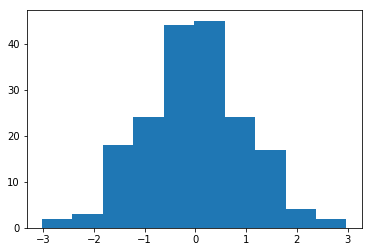

In [80]:
# Histogram of scaled winning percentage stats, not perfectly normal but not awful
plt.hist(scaled_cluster_stats['gs_wp'])
plt.show()

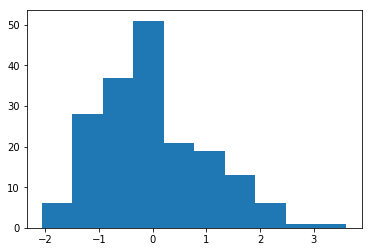

In [81]:
# Histogram of TD, more normal
plt.hist(scaled_cluster_stats['TD_pct'])
plt.show()

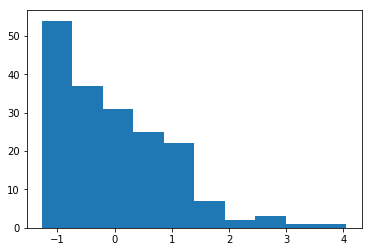

In [82]:
# Histogram of games started, most have very few games, they will probably be clustered together which is fine
plt.hist(scaled_cluster_stats['start_count'])
plt.show()

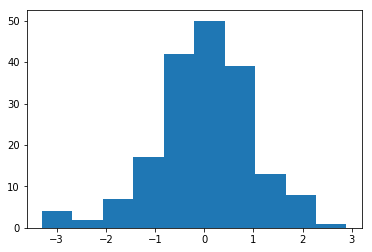

In [83]:
# Histogram of Y.A, pretty well normal, a couple of outliers on the bad end
plt.hist(scaled_cluster_stats['Y.A'])
plt.show()

In [182]:
from sklearn.cluster import KMeans
clusters = 3
kmeans = KMeans(n_clusters = clusters, random_state = 1).fit(scaled_cluster_stats)

In [183]:
scaled_cluster_stats['tier'] = kmeans.labels_ 
retired_qbs['tier'] = kmeans.labels_

/Users/Beni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
for i in range(0,clusters):
    print(i)
    print(retired_cluster_stats[scaled_cluster_stats['tier'] == i].describe())
    

# tier 1 is elite
# tier 3 is a solid QB
# tier 0 and 4 are decent
# tier 2 -scrubs

0
       start_count        Y.A     TD_pct    Int_pct      gs_wp
count    73.000000  73.000000  73.000000  73.000000  73.000000
mean     58.616438   6.483972   0.035260   0.041366   0.429313
std      25.775543   0.410984   0.004196   0.012066   0.088766
min      30.000000   5.252140   0.024925   0.021773   0.181818
25%      37.000000   6.291628   0.032357   0.033268   0.380282
50%      51.000000   6.552581   0.035334   0.038501   0.428571
75%      74.000000   6.720068   0.038206   0.046753   0.485714
max     142.000000   7.361702   0.044151   0.073598   0.651163
1
       start_count        Y.A     TD_pct    Int_pct      gs_wp
count    51.000000  51.000000  51.000000  51.000000  51.000000
mean    122.882353   7.305015   0.052479   0.052224   0.543206
std      61.119112   0.391468   0.006251   0.012046   0.111445
min      37.000000   6.404372   0.036593   0.026415   0.321429
25%      81.500000   7.036943   0.048844   0.045695   0.475469
50%     115.000000   7.313856   0.052421   0.053211

In [185]:
#These guys are great but old
retired_qbs[retired_qbs['tier'] == 1].describe()

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Year,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg,tier
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1985.960784,3567.392157,26172.686275,185.529412,169.666667,68.254902,2.294118,72.54902,69.215686,132.490196,122.882353,1977.176471,0.539857,7.305015,0.052479,0.052224,0.543206,0.433840,1.0
std,1350.628549,2114.376533,15673.773266,110.033877,68.738829,123.697671,8.372082,40.29755,40.887315,59.049258,61.119112,14.106319,0.049488,0.391468,0.006251,0.012046,0.111445,0.708280,0.0
min,473.000000,1008.000000,6647.000000,53.000000,57.000000,0.000000,0.000000,18.00000,14.000000,43.000000,37.000000,1955.000000,0.442675,6.404372,0.036593,0.026415,0.321429,0.000000,1.0
25%,1126.000000,2219.000000,16294.500000,116.500000,114.000000,0.000000,0.000000,48.50000,46.000000,95.500000,81.500000,1967.500000,0.505723,7.036943,0.048844,0.045695,0.475469,0.000000,1.0
50%,1842.000000,3217.000000,24486.000000,171.000000,173.000000,0.000000,0.000000,66.00000,63.000000,131.000000,115.000000,1974.000000,0.542356,7.313856,0.052421,0.053211,0.538462,0.000000,1.0
75%,2296.000000,4208.500000,30687.500000,227.500000,221.500000,87.000000,0.000000,89.50000,85.500000,160.500000,151.500000,1984.500000,0.568720,7.582015,0.055679,0.057945,0.619869,0.842661,1.0
max,6770.000000,10938.000000,79104.000000,578.000000,361.000000,556.000000,43.000000,199.00000,198.000000,321.000000,319.000000,2015.000000,0.655188,8.318486,0.072365,0.082677,0.797297,2.192000,1.0


In [186]:
# tier 0 = awful
# tier 1 = very good
# tier 2 = average

#qb_data.head()
qb_data_with_tiers = qb_data
qb_data_with_tiers = qb_data_with_tiers.set_index(['id']).join(retired_qbs['tier'])


In [187]:
qb_data_with_tiers

,name,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3,team_win,start_win,game_count,start_count,tier
AdamTo00,Tony Adams,1975,1975-12-14,13,25.270,KAN,@,CLE,L 14-40,True,13.0,31.0,41.94,141.0,1.0,1.0,53.3,0.0,0.0,4.55,3.74,2.0,4.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,NaN
AdamTo00,Tony Adams,1975,1975-12-21,14,25.277,KAN,@,OAK,L 20-28,True,18.0,31.0,58.06,245.0,1.0,2.0,67.3,0.0,0.0,7.90,5.65,3.0,26.0,8.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,2,NaN
AdamTo00,Tony Adams,1976,1976-10-03,4,26.198,KAN,@,BUF,L 17-50,False,17.0,32.0,53.13,319.0,2.0,3.0,69.7,0.0,0.0,9.97,7.00,1.0,21.0,21.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,2,NaN
AdamTo00,Tony Adams,1976,1976-12-12,14,26.268,KAN,NaN,CLE,W 39-14,False,15.0,29.0,51.72,201.0,1.0,0.0,85.6,0.0,0.0,6.93,7.62,2.0,13.0,6.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4,2,NaN
AdamTo00,Tony Adams,1977,1977-10-09,4,27.204,KAN,@,DEN,L 7-23,False,10.0,18.0,55.56,81.0,0.0,2.0,27.5,0.0,0.0,4.50,-0.50,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,2,NaN
AdamTo00,Tony Adams,1977,1977-10-23,6,27.218,KAN,@,SDG,W 21-16,True,15.0,26.0,57.69,215.0,1.0,0.0,97.4,0.0,0.0,8.27,9.04,2.0,8.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,3,NaN
AdamTo00,Tony Adams,1977,1977-12-11,13,27.267,KAN,NaN,SEA,L 31-34,False,7.0,13.0,53.85,135.0,0.0,2.0,50.6,0.0,0.0,10.38,3.46,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,7,3,NaN
AdamTo00,Tony Adams,1977,1977-12-18,14,27.274,KAN,@,OAK,L 20-21,True,10.0,18.0,55.56,131.0,0.0,4.0,39.1,0.0,0.0,7.28,-2.72,1.0,8.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,8,4,NaN
AdamTo00,Tony Adams,1978,1978-10-01,5,28.196,KAN,@,BUF,L 13-28,False,7.0,12.0,58.33,80.0,0.0,0.0,78.5,0.0,0.0,6.67,6.67,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,9,4,NaN
AdamTo00,Tony Adams,1978,1978-10-08,6,28.203,KAN,NaN,TAM,L 13-30,True,15.0,28.0,53.57,136.0,1.0,2.0,49.1,0.0,0.0,4.86,2.36,4.0,10.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10,5,NaN


In [188]:
retired_qb_with_tiers = qb_data_with_tiers[np.isnan(qb_data_with_tiers['tier']) == False]
len(set(retired_qb_with_tiers.index.values))

183

### Random Forest Classifier

In [189]:
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [190]:
#take the
retired_qb_with_tiers.head()

,name,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3,team_win,start_win,game_count,start_count,tier
AikmTr00,Troy Aikman+,1989,1989-09-10,1,22.293,DAL,@,NOR,L 0-28,True,17.0,35.0,48.57,180.0,0.0,2.0,40.2,2.0,30.0,5.14,2.57,1.0,13.0,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2.0
AikmTr00,Troy Aikman+,1989,1989-09-17,2,22.300,DAL,@,ATL,L 21-27,True,13.0,23.0,56.52,241.0,1.0,2.0,71.1,0.0,0.0,10.48,7.43,5.0,13.0,2.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,2,2.0
AikmTr00,Troy Aikman+,1989,1989-09-24,3,22.307,DAL,NaN,WAS,L 7-30,True,6.0,21.0,28.57,83.0,0.0,2.0,4.0,4.0,27.0,3.95,-0.33,1.0,3.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,3,2.0
AikmTr00,Troy Aikman+,1989,1989-11-12,10,22.356,DAL,@,PHO,L 20-24,True,21.0,40.0,52.50,379.0,2.0,2.0,81.1,1.0,12.0,9.48,8.23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,4,2.0
AikmTr00,Troy Aikman+,1989,1989-11-19,11,22.363,DAL,NaN,MIA,L 14-17,True,25.0,33.0,75.76,261.0,1.0,1.0,95.6,0.0,0.0,7.91,7.15,8.0,71.0,8.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,5,2.0


In [191]:
retired_qb_with_tiers.index.name='id'

In [192]:
retired_qb_with_tiers.head()

,name,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3,team_win,start_win,game_count,start_count,tier
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AikmTr00,Troy Aikman+,1989,1989-09-10,1,22.293,DAL,@,NOR,L 0-28,True,17.0,35.0,48.57,180.0,0.0,2.0,40.2,2.0,30.0,5.14,2.57,1.0,13.0,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2.0
AikmTr00,Troy Aikman+,1989,1989-09-17,2,22.300,DAL,@,ATL,L 21-27,True,13.0,23.0,56.52,241.0,1.0,2.0,71.1,0.0,0.0,10.48,7.43,5.0,13.0,2.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,2,2.0
AikmTr00,Troy Aikman+,1989,1989-09-24,3,22.307,DAL,NaN,WAS,L 7-30,True,6.0,21.0,28.57,83.0,0.0,2.0,4.0,4.0,27.0,3.95,-0.33,1.0,3.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,3,2.0
AikmTr00,Troy Aikman+,1989,1989-11-12,10,22.356,DAL,@,PHO,L 20-24,True,21.0,40.0,52.50,379.0,2.0,2.0,81.1,1.0,12.0,9.48,8.23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,4,2.0
AikmTr00,Troy Aikman+,1989,1989-11-19,11,22.363,DAL,NaN,MIA,L 14-17,True,25.0,33.0,75.76,261.0,1.0,1.0,95.6,0.0,0.0,7.91,7.15,8.0,71.0,8.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,5,2.0


In [193]:
def get_stats_for_first_x_games(full_data, games):
    reduced_data = full_data[full_data['start_count'] <= int(games)]
    sum_columns =['Cmp', 'Att','Yds','TD','Int', 'team_win','start_win']
    qb_totals = reduced_data.groupby('id')[sum_columns].sum()
    
    qb_totals['Cmp.'] = qb_totals['Cmp'] / qb_totals['Att']
    qb_totals['Y.A'] = qb_totals['Yds'] / qb_totals['Att']
    qb_totals['TD_pct'] = qb_totals['TD'] / qb_totals['Att']
    qb_totals['Int_pct'] = qb_totals['Int'] / qb_totals['Att']
    qb_totals['gs_wp'] = (qb_totals['start_win'] / games).fillna(0)
    qb_totals['tier'] = reduced_data.groupby('id')['tier'].max()
    return(qb_totals)

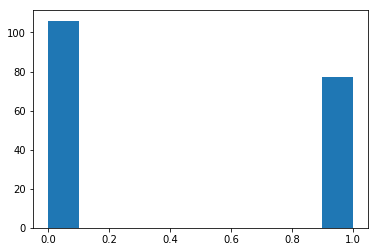

In [194]:
first_x_games = get_stats_for_first_x_games(retired_qb_with_tiers, 1)
plt.hist(first_x_games['gs_wp'])
plt.show()

# about half as many QBs won their first two games as lost their first two starts

In [195]:
first_x_games['tier_fact'] = first_x_games['tier'].astype('category')

In [196]:
X = first_x_games[['Y.A', 'TD_pct', 'Int_pct','gs_wp']]
y = first_x_games['tier_fact']

In [197]:
# classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)


# #Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
# reversefactor = dict(zip(range(3),["0","1","2"]))
# y_test = np.vectorize(reversefactor.get)(y_test)
# y_pred = np.vectorize(reversefactor.get)(y_pred)

### cross validation

In [198]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state=10)
averages = list()

for i in np.arange(1,80):
    first_x_games = get_stats_for_first_x_games(retired_qb_with_tiers, i)
    first_x_games['tier_fact'] = first_x_games['tier'].astype('category')
    X = first_x_games[['Y.A', 'TD_pct', 'Int_pct','gs_wp']]
    y = first_x_games['tier_fact']
    errors = list()
    for train, test in kf.split(X):
        X_train =  X.iloc[train]
        X_test = X.iloc[test]
        y_train = y.iloc[train]
        y_test = y.iloc[test]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        reversefactor = dict(zip(range(5),["0","1","2","3","4"]))
        y_test = np.vectorize(reversefactor.get)(y_test)
        y_pred = np.vectorize(reversefactor.get)(y_pred)
        errors.append(sum(y_test == y_pred)/len(y_test))
    averages.append(1 - np.mean(errors))   

[0.39399399399399404,
 0.34489489489489494,
 0.37117117117117115,
 0.39894894894894894,
 0.4647147147147147,
 0.46441441441441444,
 0.46996996996997,
 0.36081081081081084,
 0.4154654654654655,
 0.4256756756756757,
 0.4376876876876876,
 0.49804804804804803,
 0.5084084084084084,
 0.49744744744744746,
 0.5355855855855857,
 0.5684684684684684,
 0.6004504504504504,
 0.5848348348348348,
 0.5848348348348348,
 0.6288288288288288,
 0.6504504504504505,
 0.6175675675675676,
 0.6175675675675676,
 0.6336336336336336,
 0.6228228228228229,
 0.6222222222222222,
 0.6337837837837837,
 0.617117117117117,
 0.6496996996996998,
 0.64984984984985,
 0.6605105105105105,
 0.6887387387387387,
 0.7048048048048048,
 0.7156156156156157,
 0.7321321321321321,
 0.726876876876877,
 0.7435435435435436,
 0.7159159159159159,
 0.7543543543543544,
 0.7433933933933934,
 0.727027027027027,
 0.7211711711711712,
 0.7265765765765766,
 0.7486486486486486,
 0.7373873873873874,
 0.7376876876876877,
 0.7537537537537536,
 0.743093093

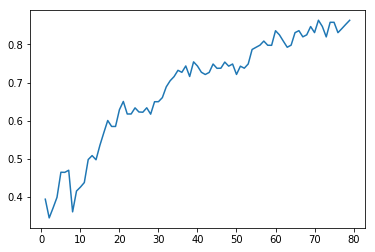

In [199]:
plt.plot(np.arange(1,80), averages)
plt.show()

In [222]:
retired_qbs['name'][retired_qbs.tier == 1]

BurkAd00         Adrian Burk
DoroAl00            Al Dorow
PariBa00        Babe Parilli
StarBa00         Bart Starr+
NelsBi00         Bill Nelsen
KilmBi00        Billy Kilmer
WadeBi00          Billy Wade
BerrBo00           Bob Berry
GrieBo00         Bob Griese+
LaynBo00        Bobby Layne+
FavrBr00        Brett Favre+
ConeCh00     Charlie Conerly
MortCr00        Craig Morton
FoutDa00          Dan Fouts+
MariDa00         Dan Marino+
dw1              Danny White
LamoDa00     Daryle Lamonica
MereDo00        Don Meredith
MorrEa00        Earl Morrall
LeBaEd00       Eddie LeBaron
TarkFr00     Fran Tarkenton+
RyanFr00          Frank Ryan
BlanGe00      George Blanda+
KempJa00           Jack Kemp
KellJi00          Jim Kelly+
PlunJi00        Jim Plunkett
NamaJo00         Joe Namath+
BrodJo00         John Brodie
HadlJo00           John Hadl
UnitJo00      Johnny Unitas+
StabKe00        Ken Stabler+
WarnKu00        Kurt Warner+
McHaLa00         Lamar McHan
DawsLe00         Len Dawson+
DickLy00      